This file is part of a program that is used to develop an objective way to
segment the fetus from ultrasound images, and to analyse the effectiveness of 
using the resulting mask to produce an unobstructed visualisation of the fetus.
The research is organised in three phases: (1) noise reduction filters, 
(2a) heuristic segmentation models, (2b) deep learning segmentation
approach (U-net), and (3) the volume visualisation. The program is developed
for the master Computational Science at the UvA from February to November 2020.

This file contains code for the heuristic segmentation models. <br>
You can run this file to plot the results of the parameters of the models.

Made by Romy Meester


In [1]:
"""
Phase 2a: The heuristic segmentation models:
- semi-automatic watershed segmentation
- fully automatic watershed segmentation
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D
from jupyterthemes import jtplot

In [2]:
jtplot.style(context='paper', fscale=1.6, ticks=True, grid=False)

In [3]:
# Constants
RESULTS_PATH = 'results_heuristic_models'
RESULTS_PARA_PATH = os.path.join(RESULTS_PATH, 'results_heuristics_para')
RESULTS_VIS_PATH = os.path.join(RESULTS_PATH, 'results_heuristics_visualisations') 
RESULTS_PLOTS_PATH = os.path.join(RESULTS_VIS_PATH, 'results_plot_para')

In [4]:
def create_dir(PATH):
    """ Create a directory. """
    try:
        os.mkdir(PATH)
        print('Directory', PATH, 'created' )
    except FileExistsError:
        print('Directory', PATH, 'already exists' )

# create results folder for the visualisations
create_dir(RESULTS_VIS_PATH)    

# create results folder for the plots of the parameters
create_dir(RESULTS_PLOTS_PATH)

Directory results_heuristic_models\results_heuristics_visualisations already exists
Directory results_heuristic_models\results_heuristics_visualisations\results_plot_para already exists


# The best parameters

In [5]:
def get_allfilenames(path): 
    """ Get the unique filenames. """
    filenames = []
    allfiles = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    
    for item, name in enumerate(allfiles):
        filenames.append(name[:-4])

    return filenames

filenames = get_allfilenames(RESULTS_PARA_PATH)

In [6]:
def open_dataframe(PATH, dataset, filename, names):
    """ Open the dataframe of a csv file. """
    name = PATH + '/' + dataset + "_" + filename + ".csv"
    df = pd.read_csv(name, sep=',', names =names)

    return df

In [7]:
def best_parameters(filenames, model):
    """ Return the best parameters based on the highest dice similarity coefficient. """
    
    # create an empty dataframe 
    column_names =["dataset", "sigma", "level1", "level2", "dice"]
    final_df = pd.DataFrame(columns = column_names)
    
    # iterate over all filenames to get the highest dice similarity coefficient per dataset
    for index, file in enumerate(filenames): 
        if model in file:            
            # load the dataset
            from_dataset = file.split('_',1)[0]
            df = open_dataframe(PATH = RESULTS_PARA_PATH, dataset = from_dataset, 
                                filename = model, names=["sigma", "level1", "level2", "dice"])

            # append hyper-parameter values to the dataframe 
            data = df.iloc[df['dice'].idxmax()]
            final_data = [from_dataset] + list(data.values)
            final_df.loc[len(final_df.index)] = final_data
            
    # append the mean values to the dataframe
    means = final_df.mean()
    final_means = ['means'] + list(means.values)
    final_df.loc[len(final_df.index)]=final_means
        
    return final_df.round(2)
       

In [8]:
def set_parameters(filenames, model, parameters):
    """ Check the dice coefficient when the datasets contain a specific hyper-parameter combination. """
    
    # create an empty dataframe 
    column_names =["dataset", "sigma", "level1", "level2", "dice"]
    final_df = pd.DataFrame(columns = column_names)
    
    # iterate over all filenames to get the highest dice similarity coefficient per dataset
    for index, file in enumerate(filenames): 
        if model in file:            
            # load the dataset
            from_dataset = file.split('_',1)[0]
            df = open_dataframe(PATH = RESULTS_PARA_PATH, dataset = from_dataset, 
                                filename = model, names=["sigma", "level1", "level2", "dice"])
            
            # append hyper-parameter values to the dataframe 
            data = df.loc[(df['sigma'] == parameters[0])  & 
                          (df['level1'] == parameters[1]) &
                          (df['level2'] == parameters[2])]
           
            final_data = [from_dataset] + list(data.values[0])
            final_df.loc[len(final_df.index)] = final_data

    # append the mean values to the dataframe
    means = final_df.mean()
    final_means = ['means'] + list(means.values)
    final_df.loc[len(final_df.index)]=final_means
    
    return final_df.round(2)

### Semi-automatic watershed segmentation (original)

In [9]:
best_parameters(filenames, model = 'ws_semiauto_org')

,dataset,sigma,level1,level2,dice
0,dataset1,1.80,4.00,1.00,0.94
1,dataset2,1.20,5.00,1.50,0.90
2,dataset3,2.00,2.50,1.00,0.94
3,dataset4,1.60,3.00,4.00,0.90
4,dataset5,1.60,4.00,3.50,0.94
5,dataset6,1.40,5.00,1.00,0.94
6,dataset7,2.00,3.50,4.00,0.93
7,means,1.66,3.86,2.29,0.92


In [10]:
set_parameters(filenames, model = 'ws_semiauto_org', parameters=[1.2, 4.0, 1.0])

,dataset,sigma,level1,level2,dice
0,dataset1,1.2,4.0,1.0,0.93
1,dataset2,1.2,4.0,1.0,0.77
2,dataset3,1.2,4.0,1.0,0.94
3,dataset4,1.2,4.0,1.0,0.89
4,dataset5,1.2,4.0,1.0,0.90
5,dataset6,1.2,4.0,1.0,0.92
6,dataset7,1.2,4.0,1.0,0.89
7,means,1.2,4.0,1.0,0.89


### Semi-automatic watershed segmentation (smoothed)

In [11]:
best_parameters(filenames, model = 'ws_semiauto_smoothed')

,dataset,sigma,level1,level2,dice
0,dataset1,1.6,3.5,1.00,0.94
1,dataset2,1.0,4.5,0.50,0.89
2,dataset3,0.8,3.5,1.00,0.94
3,dataset4,1.2,3.5,1.00,0.89
4,dataset5,1.4,4.0,3.50,0.94
5,dataset6,1.0,5.0,1.00,0.94
6,dataset7,1.4,4.0,4.00,0.92
7,means,1.2,4.0,1.71,0.92


In [12]:
set_parameters(filenames, model = 'ws_semiauto_smoothed', parameters=[1.2, 4.0, 1.0])

,dataset,sigma,level1,level2,dice
0,dataset1,1.2,4.0,1.0,0.93
1,dataset2,1.2,4.0,1.0,0.79
2,dataset3,1.2,4.0,1.0,0.26
3,dataset4,1.2,4.0,1.0,0.88
4,dataset5,1.2,4.0,1.0,0.92
5,dataset6,1.2,4.0,1.0,0.94
6,dataset7,1.2,4.0,1.0,0.90
7,means,1.2,4.0,1.0,0.80


### Fully automatic watershed segmentation (original) 

In [13]:
best_parameters(filenames, model = 'ws_fullyauto_org')

,dataset,sigma,level1,level2,dice
0,dataset1,1.80,4.00,1.00,0.91
1,dataset2,1.60,4.00,1.50,0.90
2,dataset3,2.00,2.50,1.00,0.94
3,dataset4,1.40,3.50,1.00,0.90
4,dataset5,1.60,4.00,3.50,0.91
5,dataset6,1.40,5.00,4.50,0.92
6,dataset7,2.00,4.00,1.00,0.90
7,means,1.69,3.86,1.93,0.91


In [14]:
set_parameters(filenames, model = 'ws_fullyauto_org', parameters=[1.2, 4.0, 1.0])

,dataset,sigma,level1,level2,dice
0,dataset1,1.2,4.0,1.0,0.90
1,dataset2,1.2,4.0,1.0,0.88
2,dataset3,1.2,4.0,1.0,0.94
3,dataset4,1.2,4.0,1.0,0.89
4,dataset5,1.2,4.0,1.0,0.89
5,dataset6,1.2,4.0,1.0,0.89
6,dataset7,1.2,4.0,1.0,0.88
7,means,1.2,4.0,1.0,0.90


### Fully automatic watershed segmentation (smoothed) 

In [15]:
best_parameters(filenames, model = 'ws_fullyauto_smoothed')

,dataset,sigma,level1,level2,dice
0,dataset1,1.6,3.50,1.00,0.91
1,dataset2,2.4,2.50,1.00,0.90
2,dataset3,1.0,3.50,0.50,0.94
3,dataset4,1.8,2.50,0.50,0.90
4,dataset5,1.6,5.00,1.00,0.91
5,dataset6,1.0,5.00,4.50,0.92
6,dataset7,1.8,4.00,1.00,0.90
7,means,1.6,3.71,1.36,0.91


In [16]:
set_parameters(filenames, model = 'ws_fullyauto_smoothed', parameters=[1.2, 4.0, 1.0])

,dataset,sigma,level1,level2,dice
0,dataset1,1.2,4.0,1.0,0.90
1,dataset2,1.2,4.0,1.0,0.88
2,dataset3,1.2,4.0,1.0,0.38
3,dataset4,1.2,4.0,1.0,0.88
4,dataset5,1.2,4.0,1.0,0.91
5,dataset6,1.2,4.0,1.0,0.91
6,dataset7,1.2,4.0,1.0,0.87
7,means,1.2,4.0,1.0,0.82


# Plot of surface potential

In [17]:
def open_dataframes(PATH, filename, names):
    """ Open the dataframe of a csv file. """
    name = PATH + '/' + filename + ".csv"
    df = pd.read_csv(name, sep=',', names =names)

    return df

dataset1_ws_fullyauto_org


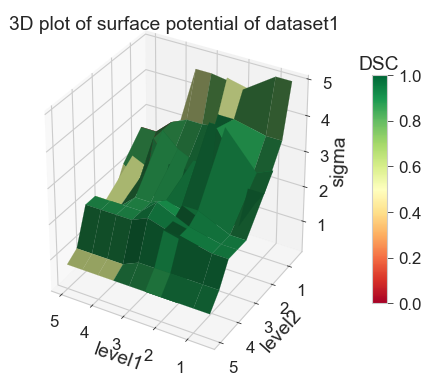

dataset1_ws_fullyauto_smoothed


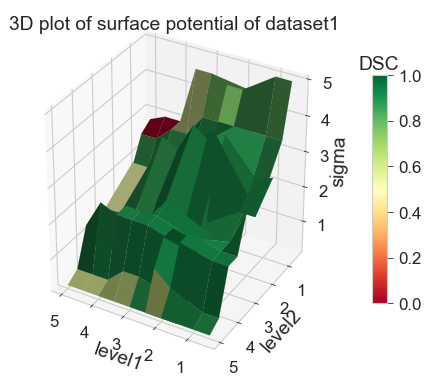

dataset1_ws_semiauto_org


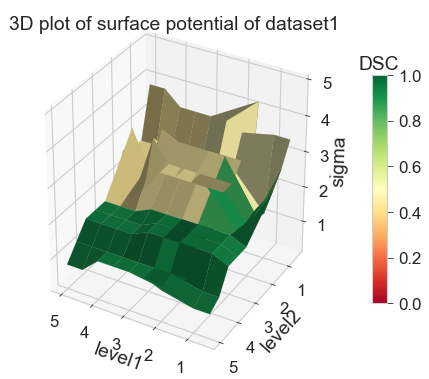

dataset1_ws_semiauto_smoothed


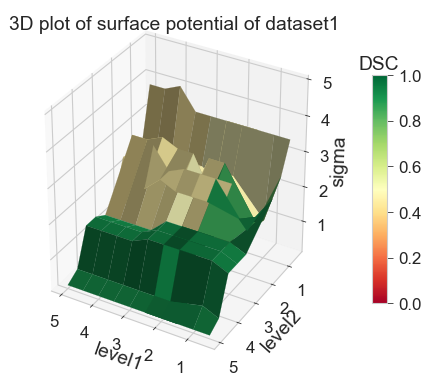

dataset2_ws_fullyauto_org


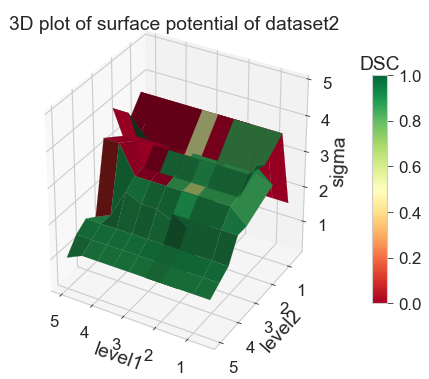

dataset2_ws_fullyauto_smoothed


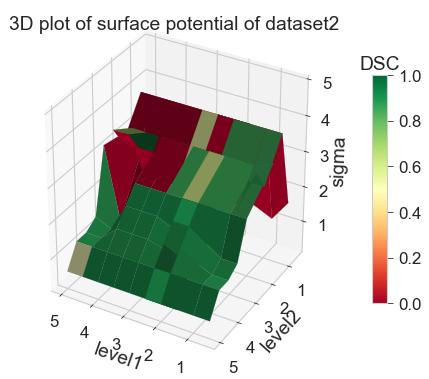

dataset2_ws_semiauto_org


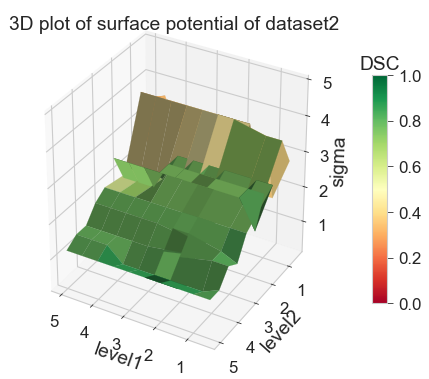

dataset2_ws_semiauto_smoothed


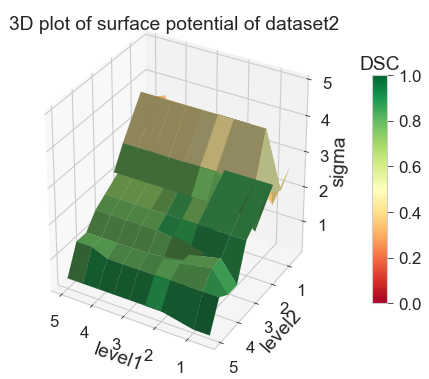

dataset3_ws_fullyauto_org


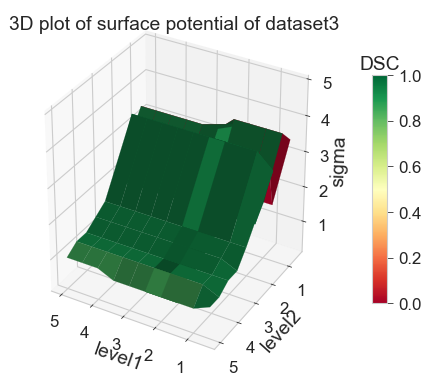

dataset3_ws_fullyauto_smoothed


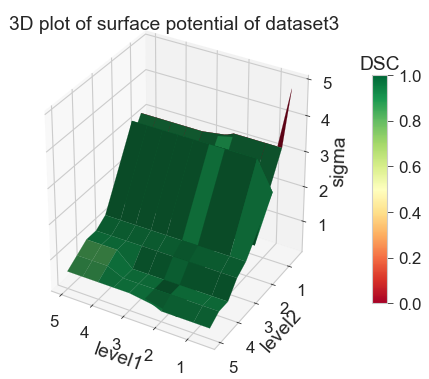

dataset3_ws_semiauto_org


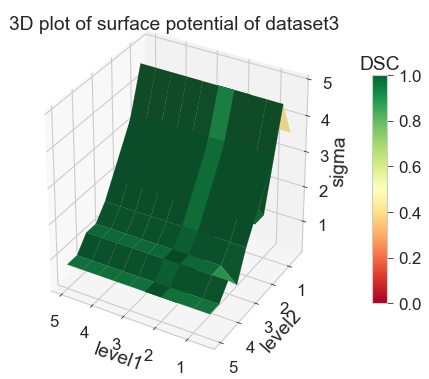

dataset3_ws_semiauto_smoothed


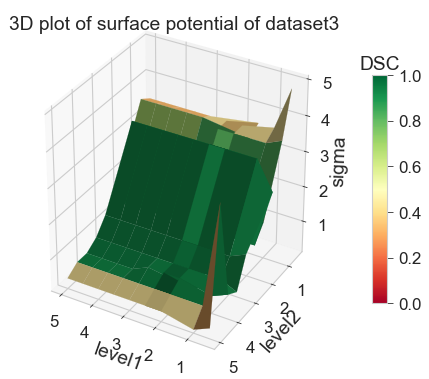

dataset4_ws_fullyauto_org


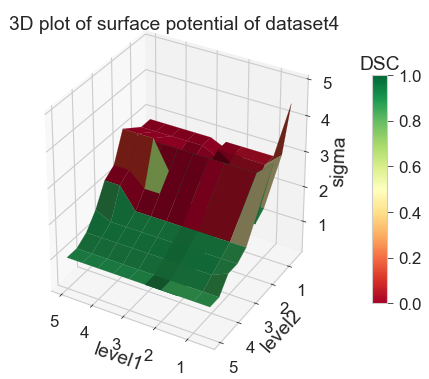

dataset4_ws_fullyauto_smoothed


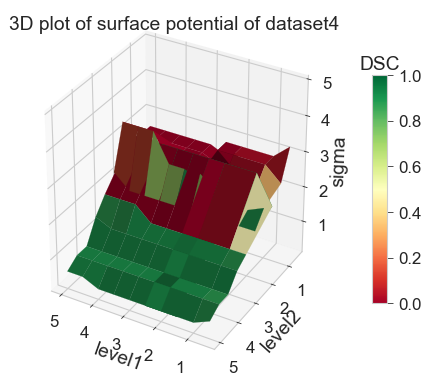

dataset4_ws_semiauto_org


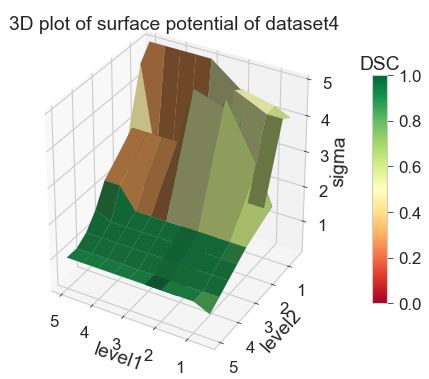

dataset4_ws_semiauto_smoothed


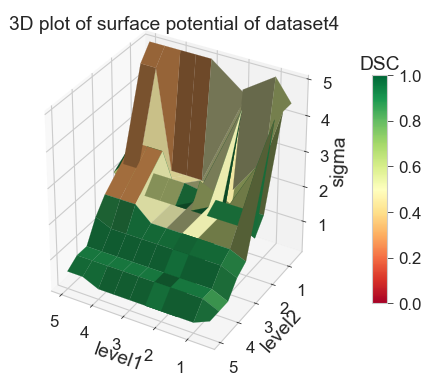

dataset5_ws_fullyauto_org


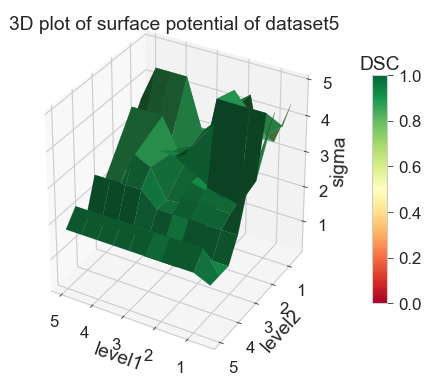

dataset5_ws_fullyauto_smoothed


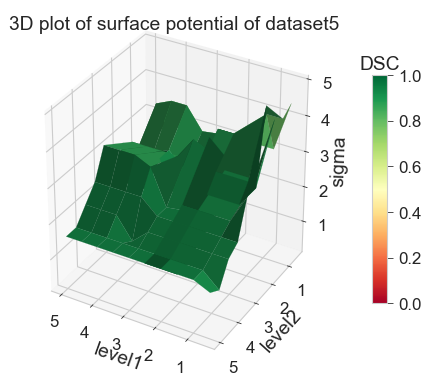

dataset5_ws_semiauto_org


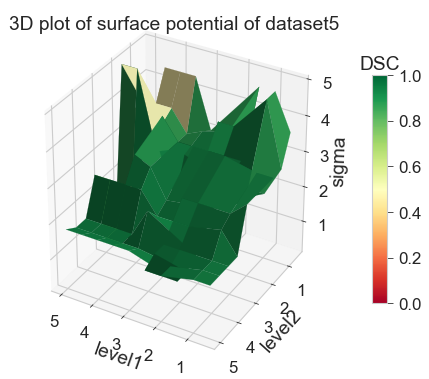

dataset5_ws_semiauto_smoothed


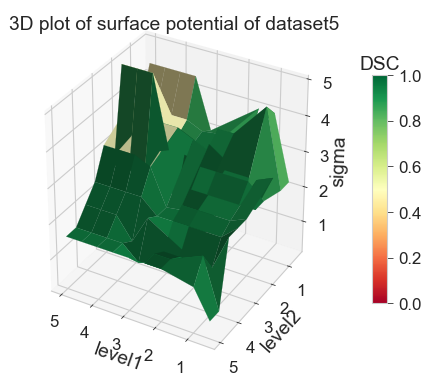

dataset6_ws_fullyauto_org


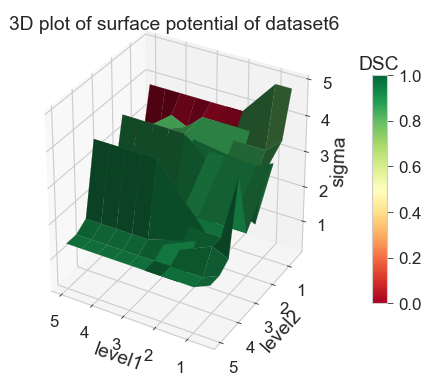

dataset6_ws_fullyauto_smoothed


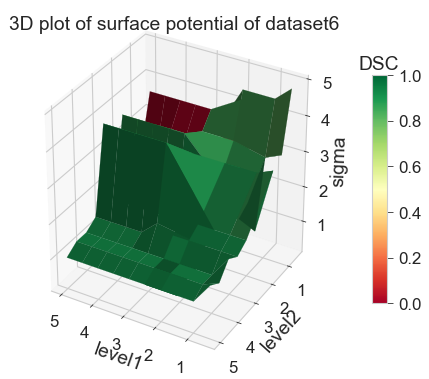

dataset6_ws_semiauto_org


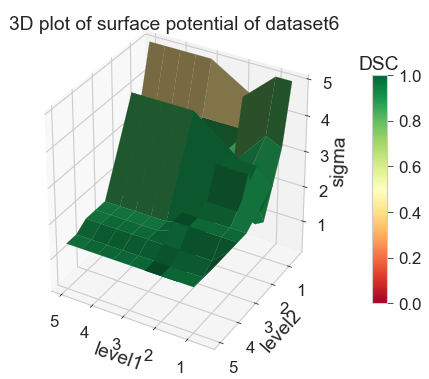

dataset6_ws_semiauto_smoothed


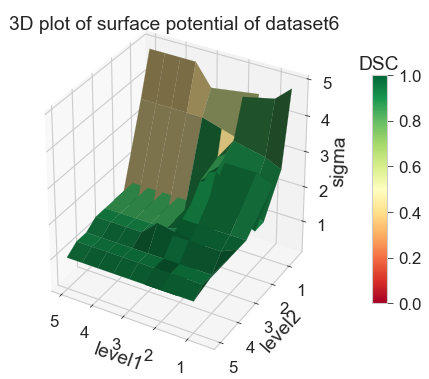

dataset7_ws_fullyauto_org


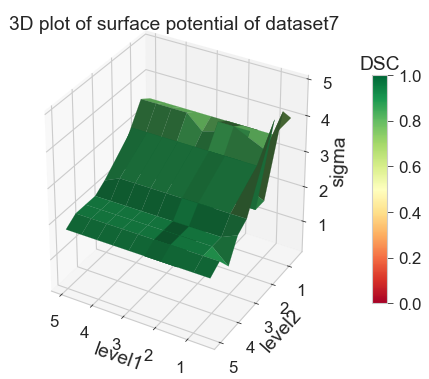

dataset7_ws_fullyauto_smoothed


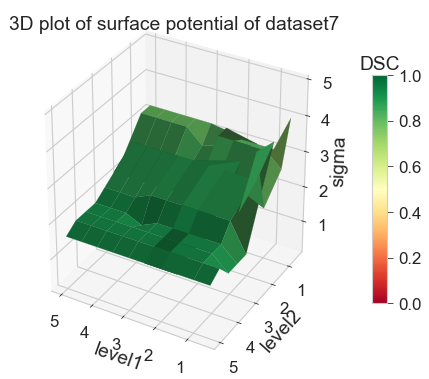

dataset7_ws_semiauto_org


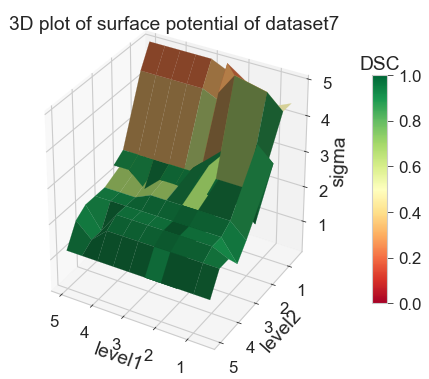

dataset7_ws_semiauto_smoothed


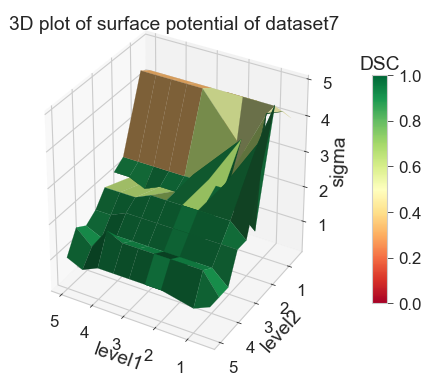

In [18]:
def create_surfaceplots(filenames): 
    """ Create the surface potential plots of the datasets. """
        
    # iterate over the files
    for file in filenames: 
        print(file)
        
        # Load the dataset 
        df = open_dataframes(PATH = RESULTS_PARA_PATH, filename = file, 
                             names=["sigma", "level1", "level2", "dice"])
        
        # calculate for Z direction the highest dice coefficient
        # with corresponding sigma
        highest_sigma = list()
        highest_dice = list()
        
        for el1 in set(df['level1']):
            sigmas = []
            dices = []
            
            for el2 in set(df['level2']):
                par_level1 = df['level1'] == el1
                par_level2 = df['level2'] == el2
                
                dice = df.where(par_level1 & par_level2).max().dice
                par_dice = df['dice'] == dice
                
                try: 
                    sigma = round(float(df.where(par_level1 & par_level2 & par_dice).dropna().sigma), 1)
                except: 
                    sigma_list = df.where(par_level1 & par_level2 & par_dice).dropna().sigma
                    sigma = min(sigma_list, key=lambda x:abs(x-sigmas[-1]))
                    
                sigmas.append(sigma)
                dices.append(dice)
                
            highest_sigma.append(sigmas)
            highest_dice.append(dices)
            
        # create variables for meshpoints
        ix = list(set(df['level1']))
        iy = list(set(df['level2']))
        X, Y = np.meshgrid(ix, iy)
        Z = np.array(highest_sigma)
        colors = np.array(highest_dice)

        # show and save the figure
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        cmap = cm.get_cmap("RdYlGn")
        surf = ax.plot_surface(X,Y,Z, facecolors=cmap(colors),
                rstride=1,cstride=1) 
        
        mappable = cm.ScalarMappable(cmap=cmap)
        mappable.set_array(colors)
        mappable.set_clim(0.0, 1.0)
        cbar = fig.colorbar(mappable, shrink=0.9, aspect=15, pad=0.08, fraction=0.04)

        from_dataset = file.split('_',1)[0]
        plt.title('3D plot of surface potential of ' + from_dataset)
        ax.set_zlim(0.2,5)
        ax.set_xlabel('level1')
        ax.set_ylabel('level2')
        ax.set_zlabel('sigma')
        cbar.ax.set_title('DSC')
        ax.view_init(30, 120)
        plt.tight_layout()
        plt.savefig(RESULTS_PLOTS_PATH + '/' + 'surface_' + file + '.png')
        plt.show()
            
create_surfaceplots(filenames)  
